### Bagging - Preprocessing de la primera parte

La idea de este notebook es entrenar con bagging de árboles con las variables utilizadas en la primera parte del trabajo y ver si se pueden obtener mejores métricas que en aquel entonces.

##### Bibliotecas

In [2]:
# Modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Preprocessing
import utils

# Búsqueda
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Plots
from matplotlib import pyplot as plt
import seaborn as sns

# Otros
import pandas as pd
import numpy as np

In [3]:
df = utils.feature_engineering(utils.get_data())

In [4]:
def primera_parte(X):
    return X[['ganancia_perdida_declarada_bolsa_argentina',
              'edad',
              'rol_familiar_registrado',
              'anios_estudiados']].copy()

X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
X = primera_parte(X)
X = pd.get_dummies(X)
Y = df['tiene_alto_valor_adquisitivo']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=27)

In [5]:
arbol = DecisionTreeClassifier()
bagging = BaggingClassifier(base_estimator=arbol, n_estimators = 501, n_jobs=-1, random_state=27)

In [6]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=501,
                  n_jobs=-1, random_state=27)

In [7]:
print(classification_report(y_test,bagging.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6186
           1       0.75      0.61      0.67      1955

    accuracy                           0.86      8141
   macro avg       0.82      0.77      0.79      8141
weighted avg       0.85      0.86      0.85      8141



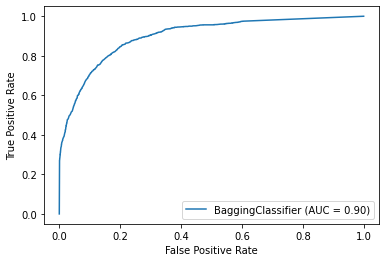

In [8]:
plot_roc_curve(bagging, X_test, y_test)

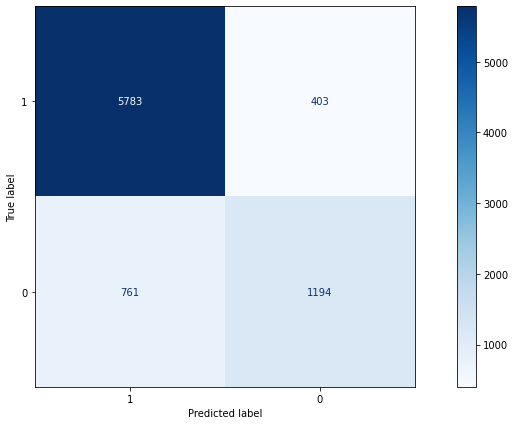

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(bagging, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()